## Code to generate Figure 2D graphics
For each peptide simulation, we calculated secondary structure using DSSP in soursop per replicate for each of the five coil-start simulations.

This code loads text files from 'data/'.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
## load csv files with dssp from replicates ##
# 'reps' indicates the data are organized per-replicate (instead of merged)

aTH4 = np.loadtxt('data/aTH4_helicity_reps.csv', delimiter = ',')
aD784A = np.loadtxt('data/aTH4_D784A_helicity_reps.csv', delimiter = ',')
aR790V = np.loadtxt('data/aTH4_R790V_helicity_reps.csv', delimiter = ',')
pTH4 = np.loadtxt('data/pTH4_helicity_reps.csv', delimiter = ',')
pD784A = np.loadtxt('data/pTH4_D784A_helicity_reps.csv', delimiter = ',')
pR790V = np.loadtxt('data/pTH4_R790V_helicity_reps.csv', delimiter = ',')

peps = [aTH4, aD784A, aR790V, pTH4, pD784A, pR790V]

In [14]:
## compute averages and standard deviations across replicates ##
# data for each peptide is stored as the following index in the populated lists:
# aTH4 == [0]
# pTH4 == [3]
# aTH4 D784A == [1]
# pTH4 D784A == [4]
# aTH4 R790V == [2]
# pTH4 R790V == [5]

averages = [] 
stds = []

for i in peps:
    averages.append(np.average(i, axis = 0))
    stds.append(np.std(i, axis = 0))

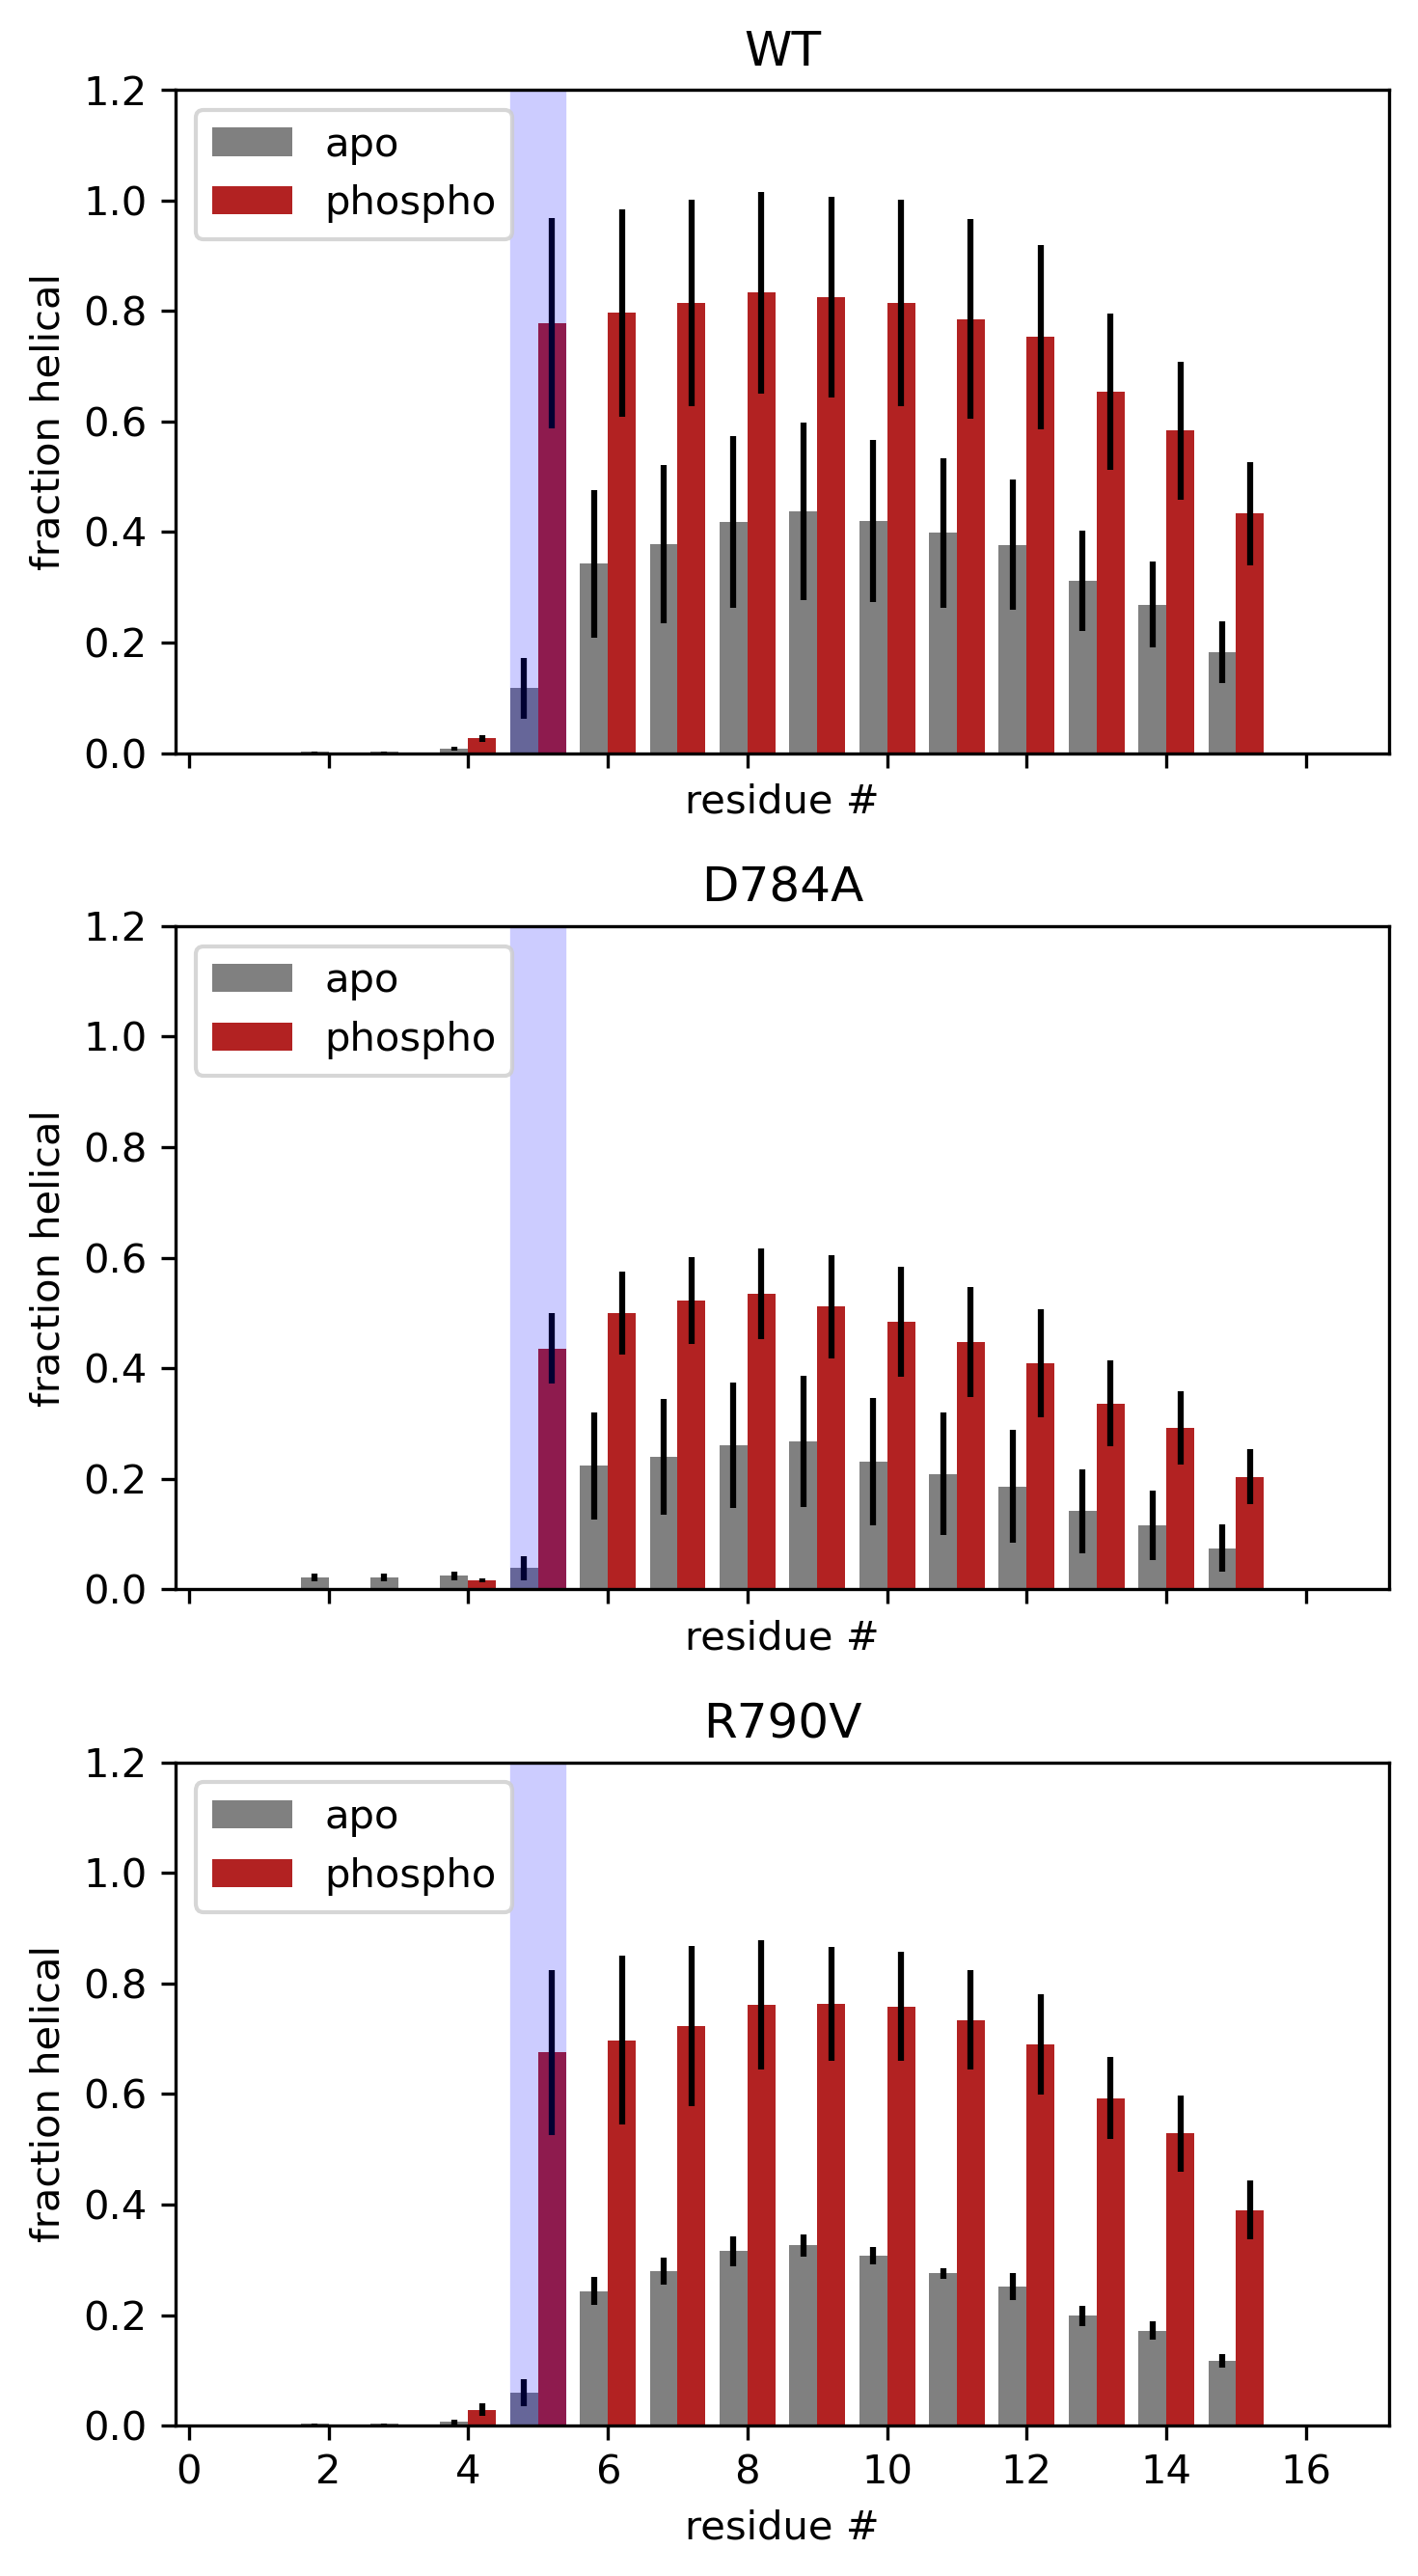

In [24]:
## generate unphos and phosphorylated DSSP plots for WT and both mutant peptides ##
# blue shaded residue is the site of phosphorylation
fig, axes = plt.subplots(3, 1, figsize = (5, 9), dpi = 300, sharex = True)

width = 0.4
residues = np.arange(1, len(aTH4.T)+1, 1)
titles = ['WT', 'D784A', 'R790V']

for j in range(3):
    ax = axes[j]
    apo_ave = averages[j]
    phospho_ave = averages[j+3]
    apo_std = stds[j]
    phospho_std = stds[j+3]
    
    ax.bar(residues - width/2, apo_ave, width, yerr = apo_std, label = 'apo', color = 'grey')
    ax.bar(residues + width/2, phospho_ave, width, yerr = phospho_std, label = 'phospho', color = 'firebrick')
    ax.set_ylabel('fraction helical')
    ax.set_xlabel('residue #')
    ax.axvline(x = 5, lw = 14, alpha = 0.2, color = 'blue')
    ax.set_ylim([0, 1.2])
    ax.legend(loc = 'upper left')
    ax.set_title(str(titles[j]))

plt.tight_layout()
plt.savefig('TH4_peptides_DSSP_2D.pdf', format = 'pdf', dpi = 300)

plt.show()